# 5. a)

In [1]:
library(MASS)
library(ISLR)
summary(Default)

 default    student       balance           income     
 No :9667   No :7056   Min.   :   0.0   Min.   :  772  
 Yes: 333   Yes:2944   1st Qu.: 481.7   1st Qu.:21340  
                       Median : 823.6   Median :34553  
                       Mean   : 835.4   Mean   :33517  
                       3rd Qu.:1166.3   3rd Qu.:43808  
                       Max.   :2654.3   Max.   :73554  

In [2]:
set.seed(1)
Default.logit <- glm(default~income+balance, family="binomial", data=Default)
summary(Default.logit)


Call:
glm(formula = default ~ income + balance, family = "binomial", 
    data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4725  -0.1444  -0.0574  -0.0211   3.7245  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.154e+01  4.348e-01 -26.545  < 2e-16 ***
income       2.081e-05  4.985e-06   4.174 2.99e-05 ***
balance      5.647e-03  2.274e-04  24.836  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1579.0  on 9997  degrees of freedom
AIC: 1585

Number of Fisher Scoring iterations: 8


# 5. b)

In [3]:
splitAndTest <- function() {
    Default.train <- sample(dim(Default)[1], dim(Default)[1]/2)
    Default.logit = glm(default~income+balance, family="binomial", data=Default, subset=Default.train)
    
    Default.logit.probs <- predict(Default.logit, Default[-Default.train,])
    Default.logit.pred <- rep("No", dim(Default)[1])
    Default.logit.pred[Default.logit.probs > 0.5] = "Yes"
    return(mean(Default.logit.pred != Default[-Default.train, ]$default))
}

splitAndTest()

[1] 0.0284

# 5. c)

In [4]:
#pass in some fitting procedure and repeat it n times

runIter <- function(func, iter) {
    total <- 0
    for (i in 1:iter) {
        total <- total + func()
    }
    return(total/iter)
}

runIter(splitAndTest, 20)

[1] 0.02707

The error rate seems to hover around the 2.76% mark.

# 5. d)

In [5]:
splitAndTest2 <- function() {
    Default.train <- sample(dim(Default)[1], dim(Default)[1]/2)
    Default.logit2 <- glm(default~income+balance+student, family="binomial", data=Default, subset=Default.train)

    Default.logit2.probs <- predict(Default.logit2, Default[-Default.train, ])
    Default.logit2.pred <- rep("No", dim(Default)[1])
    Default.logit2.pred[Default.logit2.probs > 0.5] = "Yes"
    mean(Default.logit2.pred != Default[-Default.train, ]$default)
}

runIter(splitAndTest2, 20)

[1] 0.02764

It does not seem to lead to a reduction in the test error rate.

# 6. a)

In [6]:
Default.logit2 <- glm(default~income+balance, family="binomial", data=Default)
summary(Default.logit2)


Call:
glm(formula = default ~ income + balance, family = "binomial", 
    data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4725  -0.1444  -0.0574  -0.0211   3.7245  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.154e+01  4.348e-01 -26.545  < 2e-16 ***
income       2.081e-05  4.985e-06   4.174 2.99e-05 ***
balance      5.647e-03  2.274e-04  24.836  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1579.0  on 9997  degrees of freedom
AIC: 1585

Number of Fisher Scoring iterations: 8


The estimates for the standard errors are: $B_1=0.4348, B_2=0.000004985, B_3=0.0002274$.

# 6. b)

In [7]:
boot.fn <- function(data, index) {
    fit <- glm(default~income+balance, family="binomial", data=data, subset=index)
    return(coef(fit))
}

# 6. c)

In [8]:
library(boot)
boot(Default, boot.fn, 100)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Default, statistic = boot.fn, R = 100)


Bootstrap Statistics :
         original        bias     std. error
t1* -1.154047e+01  5.900166e-02 4.230763e-01
t2*  2.080898e-05  1.824949e-07 4.744227e-06
t3*  5.647103e-03 -3.582489e-05 2.117928e-04

# 6. d)

The estimates are very close. This means that the model is fairly consistent across subsamples of the data.

# 7. a)

In [9]:
Weekly.logit <- glm(Direction~Lag1+Lag2, family="binomial", data=Weekly)

# 7. b)

In [18]:
Weekly.logit.loocv <- glm(Direction~Lag1+Lag2, family="binomial", data=Weekly[-1, ])

# 7. c)

In [91]:
Weekly.logit.pred <- predict(Weekly.logit.loocv, Weekly[1, ], type="response")
Weekly.logit.pred > 0.5
Weekly$Direction[1]

1 
TRUE

[1] Down
Levels: Down Up

The prediction was incorrect - the real direction was downwards.

# 7. d)

In [31]:
Weekly.length <- length(Weekly$Direction)

errors = rep(0, Weekly.length)
for (i in 1:Weekly.length) {
    Weekly.logit.loocv <- glm(Direction~Lag1+Lag2, family="binomial", data=Weekly[-i, ])
    Weekly.logit.pred = "Up"
    if (predict(Weekly.logit.loocv, Weekly[i, ]) < 0.5)
        Weekly.logit.pred = "Down"
    if (Weekly.logit.pred == Weekly$Direction[i])
        errors[i] = 1
}
sum(errors)

[1] 495

In total, there are 495 errors.

# 7. e)

In [32]:
mean(errors)

[1] 0.4545455

There is a LOOCV error rate of 45.5%.

# 8. a)

In [46]:
set.seed(1)
y <- rnorm(100)
x <- rnorm(100)
y <- x - 2*x^2 + rnorm(100)

# 8. b)

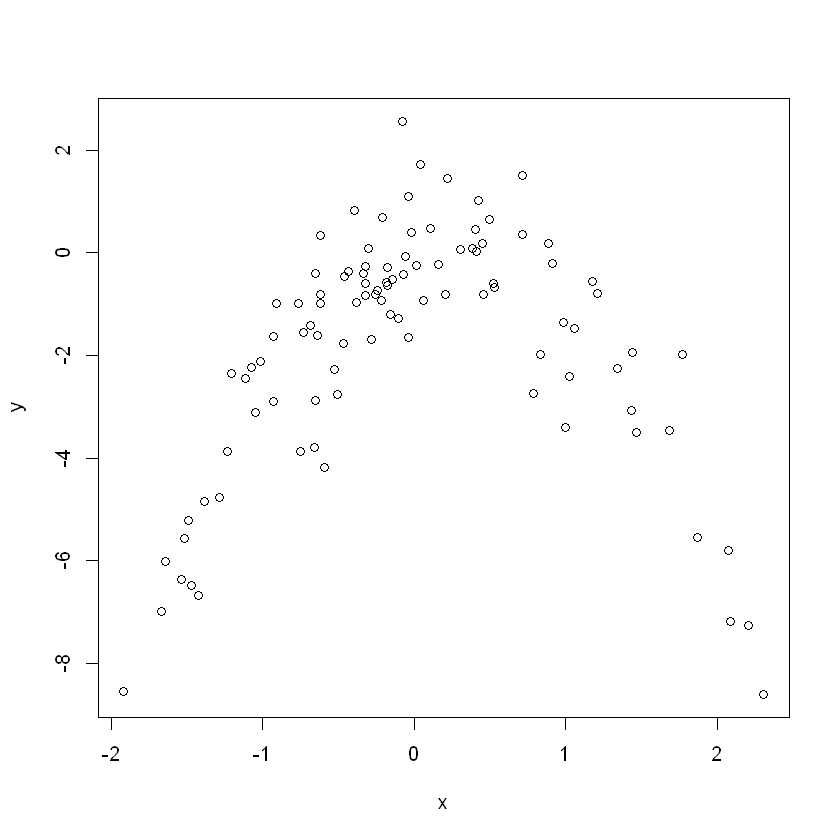

In [47]:
plot(y~x)

There is clearly a quadratic relationship between x and y.

# 8. c)

In [48]:
library(boot)
xy <- data.frame(x, y)
set.seed(10)

In [49]:
# i)

xy.fit1 <- glm(y~x)
cv.glm(xy, xy.fit1)$delta

[1] 5.890979 5.888812

In [50]:
# ii)

xy.fit2 <- glm(y~poly(x,2))
cv.glm(xy, xy.fit2)$delta

[1] 1.086596 1.086326

In [51]:
# iii)

xy.fit3 <- glm(y~poly(x,3))
cv.glm(xy, xy.fit3)$delta

[1] 1.102585 1.102227

In [52]:
# iv)

xy.fit4 <- glm(y~poly(x,4))
cv.glm(xy, xy.fit4)$delta

[1] 1.114772 1.114334

# 8. d)

In cross validation, a dataset is split into "folds", of which they will be used to train and test the models. This is where the seed will come into play - it will randomly split the datset into a series of folds.

Because we are doing LOOCV, this essentially means we split the dataset into folds of size one. It does not matter what the seed is because LOOCV will split the dataset into the largest number of folds possible each time.

# 8. e)

The second model had the smallest test error. This was to be expected, since the true relationship is quadratic. (iii) and (iv) still performed fairly well, but was likely overfit.

In [54]:
summary(xy.fit1)


Call:
glm(formula = y ~ x)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-7.3469  -0.9275   0.8028   1.5608   4.3974  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.8185     0.2364  -7.692 1.14e-11 ***
x             0.2430     0.2479   0.981    0.329    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 5.580018)

    Null deviance: 552.21  on 99  degrees of freedom
Residual deviance: 546.84  on 98  degrees of freedom
AIC: 459.69

Number of Fisher Scoring iterations: 2


In [55]:
summary(xy.fit2)


Call:
glm(formula = y ~ poly(x, 2))

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.89884  -0.53765   0.04135   0.61490   2.73607  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.8277     0.1032 -17.704   <2e-16 ***
poly(x, 2)1   2.3164     1.0324   2.244   0.0271 *  
poly(x, 2)2 -21.0586     1.0324 -20.399   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 1.06575)

    Null deviance: 552.21  on 99  degrees of freedom
Residual deviance: 103.38  on 97  degrees of freedom
AIC: 295.11

Number of Fisher Scoring iterations: 2


In [56]:
summary(xy.fit3)


Call:
glm(formula = y ~ poly(x, 3))

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.87250  -0.53881   0.02862   0.59383   2.74350  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.8277     0.1037 -17.621   <2e-16 ***
poly(x, 3)1   2.3164     1.0372   2.233   0.0279 *  
poly(x, 3)2 -21.0586     1.0372 -20.302   <2e-16 ***
poly(x, 3)3  -0.3048     1.0372  -0.294   0.7695    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 1.075883)

    Null deviance: 552.21  on 99  degrees of freedom
Residual deviance: 103.28  on 96  degrees of freedom
AIC: 297.02

Number of Fisher Scoring iterations: 2


In [57]:
summary(xy.fit4)


Call:
glm(formula = y ~ poly(x, 4))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8914  -0.5244   0.0749   0.5932   2.7796  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.8277     0.1041 -17.549   <2e-16 ***
poly(x, 4)1   2.3164     1.0415   2.224   0.0285 *  
poly(x, 4)2 -21.0586     1.0415 -20.220   <2e-16 ***
poly(x, 4)3  -0.3048     1.0415  -0.293   0.7704    
poly(x, 4)4  -0.4926     1.0415  -0.473   0.6373    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 1.084654)

    Null deviance: 552.21  on 99  degrees of freedom
Residual deviance: 103.04  on 95  degrees of freedom
AIC: 298.78

Number of Fisher Scoring iterations: 2


Yes, they agree with the conclusions based on the LOOCV results. In all of the summaries, the most significant term is the quadratic term, and the third and fourth terms are not significant.

# 9. a)

In [90]:
medv.mean <- mean(Boston$medv)
medv.mean

[1] 22.53281

# 9. b)

In [89]:
medv.se <- sd(Boston$medv)/sqrt(length(Boston$medv))
medv.se

[1] 0.4088611

# 9. c)

In [88]:
library(boot)
boot.fn <- function(data, index){ return(mean(data[index])) }
medv.se.bootstrap <- boot(Boston$medv, boot.fn, 1000)
medv.se.bootstrap


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Boston$medv, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
    original       bias    std. error
t1* 22.53281 -0.003277668   0.3953685

It's fairly close.

# 9. d)

A 95% confidence interval would be $21.693523 \rightarrow 23.372097$.

In [76]:
t.test(Boston$medv)


	One Sample t-test

data:  Boston$medv
t = 55.111, df = 505, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 21.72953 23.33608
sample estimates:
mean of x 
 22.53281 


The estimated confidence interval is very close to the t.test estimate: boh are only off by up to 0.05.

# 9. e)

In [87]:
medv.median <- median(Boston$medv)
medv.median

[1] 21.2

# 9. f)

In [86]:
boot.fn <- function(data, index) { return(median(data[index]))}
medv.median.bootstrap <- boot(Boston$medv, boot.fn, 1000)
medv.median.bootstrap


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Boston$medv, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
    original   bias    std. error
t1*     21.2 -0.01485   0.3641422

We have an estimated median of 21.2. From our bootstrap sampling, we estimate a standard error of approximately 0.377.

# 9. g)

In [85]:
medv.tenth <- quantile(Boston$medv, c(0.1))
medv.tenth

10% 
12.75

# 9. h)

In [93]:
boot.fn <- function(data, index) { return(quantile(data[index], c(0.1)))}
medv.tenthquantile.bootstrap <- boot(Boston$medv, boot.fn, 1000)
medv.tenthquantile.bootstrap


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Boston$medv, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
    original  bias    std. error
t1*    12.75  -7e-04   0.5075057

The estimated standard error is approximately 0.507.